In [1]:
import numpy as np  
import matplotlib.pyplot as plt
from param_est import OnlineParamEst
import importlib

In [2]:
param_est = OnlineParamEst()
# 1) Run both simulations
x_deka, u_deka, theta_deka, theta_hat_deka = param_est.simulate_quadrotor_hover_with_DEKA(NSIM=300)
print("finished DEKA simulation")

step 5
max iter reached
theta:  [3.50e-02 1.66e-05 8.30e-07 7.20e-07 1.66e-05 1.80e-06 2.93e-05] 
theta_hat [3.570138934e-02 1.660000000e-05 8.300000000e-07 7.200000000e-07
 1.660000000e-05 1.800000000e-06 2.930000000e-05] 

step 10
max iter reached
theta:  [3.50e-02 1.66e-05 8.30e-07 7.20e-07 1.66e-05 1.80e-06 2.93e-05] 
theta_hat [3.6237978631e-02 1.6600000000e-05 8.3000000000e-07 7.2000000000e-07
 1.6600000000e-05 1.8000000000e-06 2.9300000000e-05] 

step 15
max iter reached
theta:  [3.2931224415e-02 1.6600000000e-05 8.3000000000e-07 7.2000000000e-07
 1.6600000000e-05 1.8000000000e-06 2.9300000000e-05] 
theta_hat [3.2776469199e-02 1.6600000000e-05 8.3000000000e-07 7.2000000000e-07
 1.6600000000e-05 1.8000000000e-06 2.9300000000e-05] 

step 20
max iter reached
theta:  [3.2931224415e-02 1.6600000000e-05 8.3000000000e-07 7.2000000000e-07
 1.6600000000e-05 1.8000000000e-06 2.9300000000e-05] 
theta_hat [3.1938004604e-02 1.6600000000e-05 8.3000000000e-07 7.2000000000e-07
 1.6600000000e-05

In [3]:
x_rls,  u_rls,  theta_rls,  theta_hat_rls  = param_est.simulate_quadrotor_hover_with_RLS(NSIM=300)
print("finished RLS simulation")

finished RLS simulation


In [4]:
Q = 1e-5 * np.eye(7)
R = 1e-5 * np.eye(6*10)
x_kf,  u_kf,  theta_kf,  theta_hat_kf  = param_est.simulate_quadrotor_hover_with_KF(NSIM=300, Q_noise=Q, R_noise=R)
print("finished KF simulation")
# x_mpc,  u_mpc,  theta_mpc,  theta_hat_mpc  = param_est.simulate_quadrotor_hover_with_no_estimation()
# print("finished naive mpc simulation")

t = np.arange(300)  # time steps 0..N-1


finished KF simulation


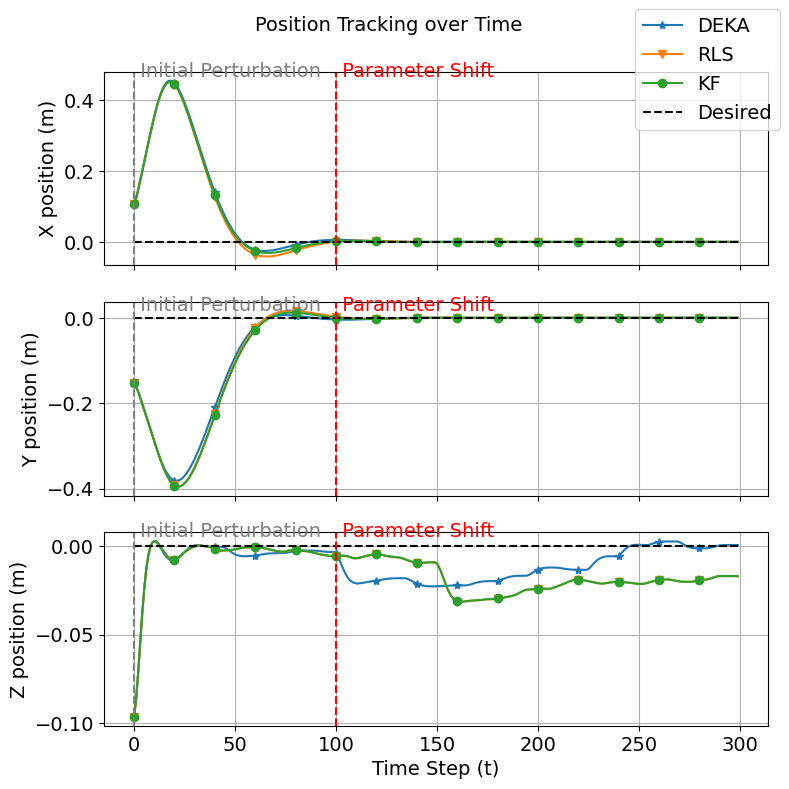

In [29]:
t = np.arange(300)  # time steps 0..N-1

x_pos_deka  = [row[0] for row in x_deka]
x_pos_rls   = [row[0] for row in x_rls]
x_pos_kf   = [row[0] for row in x_kf]
# x_pos_mpc = [row[0] for row in x_mpc]
# x_pos_des   = [row[0] for row in x_des][:200]
y_pos_deka  = [row[1] for row in x_deka]
y_pos_rls   = [row[1] for row in x_rls]
y_pos_kf   = [row[1] for row in x_kf]
# y_pos_mpc = [row[1] for row in x_mpc]

# y_pos_des   = [row[1] for row in x_des][:200]
z_pos_deka  = [row[2] for row in x_deka]
z_pos_rls   = [row[2] for row in x_rls]
z_pos_kf   = [row[2] for row in x_kf]
# z_pos_mpc = [row[2] for row in x_mpc]

# z_pos_des   = [row[2] for row in x_des][:200]

hov_des = np.linspace(0,0,200)

theta_hat_deka_array = np.array(theta_hat_deka)
theta_deka_array = np.array(theta_deka)
theta_hat_rls_array = np.array(theta_hat_rls)
theta_rls_array = np.array(theta_rls)
theta_hat_ekf_array = np.array(theta_hat_kf)
theta_ekf_array = np.array(theta_kf)

hov_des = np.zeros_like(x_pos_deka)
import numpy as np
import matplotlib.pyplot as plt

# Create one figure with three subplots (stacked vertically)
fig, axs = plt.subplots(3, 1, figsize=(8, 8), sharex=True)
fig.suptitle('Position Tracking over Time', fontsize=14)

# Define colors for better distinction
colors = {
    'deka': 'tab:blue',
    'rls': 'tab:orange',
    'kf': 'tab:green',
    'desired': 'black',
    'parameter_shift': 'red',
    'initial_perturbation': 'gray'
}

# X position
axs[0].plot(t, x_pos_deka, marker="*", markevery=20, color=colors['deka'], label='DEKA')
axs[0].plot(t, x_pos_rls, marker="v", markevery=20, color=colors['rls'], label='RLS')
axs[0].plot(t, x_pos_kf, marker="o", markevery=20, color=colors['kf'], label='KF')
axs[0].plot(t, hov_des, color=colors['desired'], linestyle='--', label='Desired')

axs[0].axvline(x=100, color=colors['parameter_shift'], linestyle='--', label='Parameter Shift')
axs[0].axvline(x=0, color=colors['initial_perturbation'], linestyle='--', label='Initial Perturbation')

# Add vertical line labels
axs[0].text(100, max(x_pos_deka), ' Parameter Shift', color=colors['parameter_shift'], verticalalignment='bottom')
axs[0].text(0, max(x_pos_deka), ' Initial Perturbation', color=colors['initial_perturbation'], verticalalignment='bottom')

axs[0].set_ylabel('X position (m)')
axs[0].grid(True)

# Y position
axs[1].plot(t, y_pos_deka, marker="*", markevery=20, color=colors['deka'])
axs[1].plot(t, y_pos_rls, marker="v", markevery=20, color=colors['rls'])
axs[1].plot(t, y_pos_kf, marker="o", markevery=20, color=colors['kf'])
axs[1].plot(t, hov_des, color=colors['desired'], linestyle='--')

axs[1].axvline(x=100, color=colors['parameter_shift'], linestyle='--')
axs[1].axvline(x=0, color=colors['initial_perturbation'], linestyle='--')

axs[1].text(100, max(y_pos_deka), ' Parameter Shift', color=colors['parameter_shift'], verticalalignment='bottom')
axs[1].text(0, max(y_pos_deka), ' Initial Perturbation', color=colors['initial_perturbation'], verticalalignment='bottom')

axs[1].set_ylabel('Y position (m)')
axs[1].grid(True)

# Z position
axs[2].plot(t, z_pos_deka, marker="*", markevery=20, color=colors['deka'])
axs[2].plot(t, z_pos_rls, marker="v", markevery=20, color=colors['rls'])
axs[2].plot(t, z_pos_kf, marker="o", markevery=20, color=colors['kf'])
axs[2].plot(t, hov_des, color=colors['desired'], linestyle='--')

axs[2].axvline(x=100, color=colors['parameter_shift'], linestyle='--')
axs[2].axvline(x=0, color=colors['initial_perturbation'], linestyle='--')

axs[2].text(100, max(z_pos_deka), ' Parameter Shift', color=colors['parameter_shift'], verticalalignment='bottom')
axs[2].text(0, max(z_pos_deka), ' Initial Perturbation', color=colors['initial_perturbation'], verticalalignment='bottom')

axs[2].set_xlabel('Time Step (t)')
axs[2].set_ylabel('Z position (m)')
axs[2].grid(True)

# Create a single legend outside the subplots
fig.legend(['DEKA', 'RLS', 'KF', 'Desired'])

plt.tight_layout()  # Adjust layout to fit the legend
plt.show()


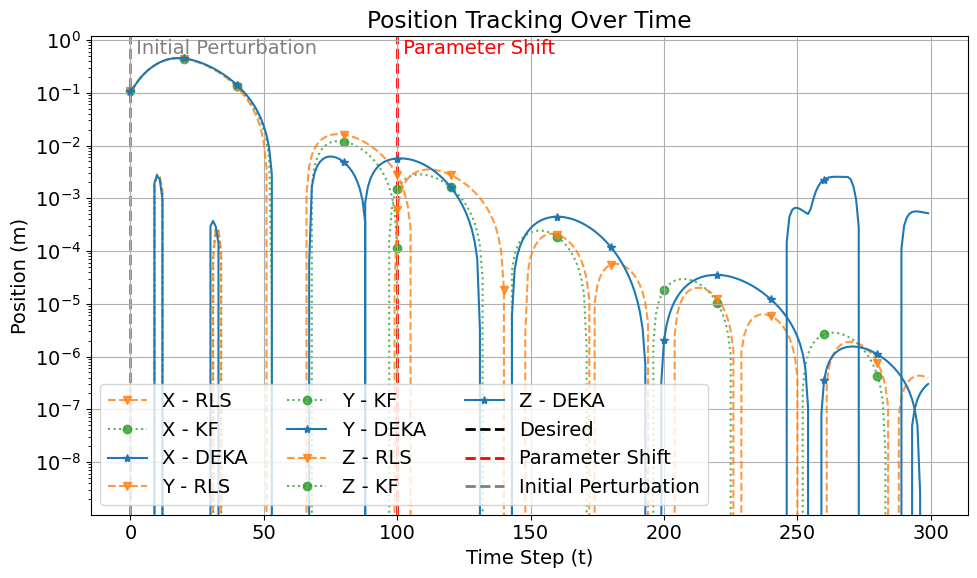

In [19]:
t = np.arange(300)  # time steps 0..N-1

x_pos_deka  = [row[0] for row in x_deka]
x_pos_rls   = [row[0] for row in x_rls]
x_pos_kf   = [row[0] for row in x_kf]
# x_pos_mpc = [row[0] for row in x_mpc]
# x_pos_des   = [row[0] for row in x_des][:200]
y_pos_deka  = [row[1] for row in x_deka]
y_pos_rls   = [row[1] for row in x_rls]
y_pos_kf   = [row[1] for row in x_kf]
# y_pos_mpc = [row[1] for row in x_mpc]

# y_pos_des   = [row[1] for row in x_des][:200]
z_pos_deka  = [row[2] for row in x_deka]
z_pos_rls   = [row[2] for row in x_rls]
z_pos_kf   = [row[2] for row in x_kf]
# z_pos_mpc = [row[2] for row in x_mpc]

# z_pos_des   = [row[2] for row in x_des][:200]

hov_des = np.linspace(0,0,200)

theta_hat_deka_array = np.array(theta_hat_deka)
theta_deka_array = np.array(theta_deka)
theta_hat_rls_array = np.array(theta_hat_rls)
theta_rls_array = np.array(theta_rls)
theta_hat_ekf_array = np.array(theta_hat_kf)
theta_ekf_array = np.array(theta_kf)

hov_des = np.zeros_like(x_pos_deka)

import numpy as np
import matplotlib.pyplot as plt

# Define colors and markers for better distinction
colors = {
    'deka': 'tab:blue',  # Blue for DEKA
    'rls': 'tab:orange',  # Orange for RLS
    'kf': 'tab:green',    # Green for KF
    'desired': 'black',
    'parameter_shift': 'red',
    'initial_perturbation': 'gray'
}

markers = {
    'deka': '*',
    'rls': 'v',
    'kf': 'o'
}

# Create a single figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Ensure DEKA is on top by setting higher zorder
ax.plot(t, x_pos_rls, marker=markers['rls'], markevery=20, color=colors['rls'], linestyle='dashed', alpha=0.8, label='X - RLS', zorder=2)
ax.plot(t, x_pos_kf, marker=markers['kf'], markevery=20, color=colors['kf'], linestyle='dotted', alpha=0.8, label='X - KF', zorder=1)
ax.plot(t, x_pos_deka, marker=markers['deka'], markevery=20, color=colors['deka'], linewidth=1.5, label='X - DEKA', zorder=3)

ax.plot(t, y_pos_rls, marker=markers['rls'], markevery=20, color=colors['rls'], linestyle='dashed', alpha=0.8, label='Y - RLS', zorder=2)
ax.plot(t, y_pos_kf, marker=markers['kf'], markevery=20, color=colors['kf'], linestyle='dotted', alpha=0.8, label='Y - KF', zorder=1)
ax.plot(t, y_pos_deka, marker=markers['deka'], markevery=20, color=colors['deka'], linewidth=1.5, label='Y - DEKA', zorder=3)

ax.plot(t, z_pos_rls, marker=markers['rls'], markevery=20, color=colors['rls'], linestyle='dashed', alpha=0.8, label='Z - RLS', zorder=2)
ax.plot(t, z_pos_kf, marker=markers['kf'], markevery=20, color=colors['kf'], linestyle='dotted', alpha=0.8, label='Z - KF', zorder=1)
ax.plot(t, z_pos_deka, marker=markers['deka'], markevery=20, color=colors['deka'], linewidth=1.5, label='Z - DEKA', zorder=3)

# Plot desired position (hov_des) in black dashed line
ax.plot(t, hov_des, color=colors['desired'], linestyle='--', linewidth=2, label='Desired')

# Add vertical lines with labels
ax.axvline(x=100, color=colors['parameter_shift'], linestyle='--', linewidth=2, label='Parameter Shift', zorder=0)
ax.axvline(x=0, color=colors['initial_perturbation'], linestyle='--', linewidth=2, label='Initial Perturbation', zorder=0)

# Add text annotation for vertical lines
ax.text(100, max(x_pos_deka + y_pos_deka + z_pos_deka), ' Parameter Shift', color=colors['parameter_shift'], verticalalignment='bottom')
ax.text(0, max(x_pos_deka + y_pos_deka + z_pos_deka), ' Initial Perturbation', color=colors['initial_perturbation'], verticalalignment='bottom')

# Labels and title
ax.set_xlabel('Time Step (t)')
ax.set_ylabel('Position (m)')
ax.set_title('Position Tracking Over Time')

ax.set_yscale("log")

# Grid and legend
ax.grid(True)
ax.legend(loc='best', ncol=3)  # Adjust columns for better readability

plt.tight_layout()
plt.show()


In [7]:
# q0_deka  = [row[3] for row in x_deka]
# q0_rls   = [row[3] for row in x_rls]
# q0_kf   = [row[3] for row in x_kf]
# q0_des = np.linspace(1,1,300)

# q1_deka  = [row[4] for row in x_deka]
# q1_rls   = [row[4] for row in x_rls]
# q1_kf   = [row[4] for row in x_kf]
# q1_des = np.linspace(0,0,300)

# q2_deka  = [row[5] for row in x_deka]
# q2_rls   = [row[5] for row in x_rls]
# q2_kf   = [row[5] for row in x_kf]
# q2_des = np.linspace(0,0,300)


# q3_deka  = [row[6] for row in x_deka]
# q3_rls   = [row[6] for row in x_rls]
# q3_kf   = [row[6] for row in x_kf]
# q3_des = np.linspace(0,0,300)

# # Create subplots for quaternion components
# fig, axs = plt.subplots(4, 1, figsize=(8, 10), sharex=True)

# # q0 component
# axs[0].plot(t, q0_deka, label='DEKA q0')
# axs[0].plot(t, q0_rls, label='RLS q0')
# axs[0].plot(t, q0_kf, label='KF q0')
# axs[0].plot(t, q0_des, '--', label='desired q0')    
# axs[0].set_ylabel('q0')
# axs[0].legend()
# axs[0].grid(True)

# # q1 component
# axs[1].plot(t, q1_deka, label='DEKA q1')
# axs[1].plot(t, q1_rls, label='RLS q1')
# axs[1].plot(t, q1_kf, label='KF q1')
# axs[1].plot(t, q1_des, '--', label='desired q1')
# axs[1].set_ylabel('q1')
# axs[1].legend()
# axs[1].grid(True)

# # q2 component
# axs[2].plot(t, q2_deka, label='DEKA q2')
# axs[2].plot(t, q2_rls, label='RLS q2')
# axs[2].plot(t, q2_kf, label='KF q2')
# axs[2].plot(t, q2_des, '--', label='desired q2')
# axs[2].set_ylabel('q2')
# axs[2].legend()
# axs[2].grid(True)

# # q3 component
# axs[3].plot(t, q3_deka, label='DEKA q3')
# axs[3].plot(t, q3_rls, label='RLS q3')
# axs[3].plot(t, q3_kf, label='KF q3')
# axs[3].plot(t, q3_des, '--', label='desired q3')
# axs[3].set_xlabel('Time Step')
# axs[3].set_ylabel('q3')
# axs[3].legend()
# axs[3].grid(True)

# # Set title and layout
# fig.suptitle('Quaternion Tracking')
# plt.tight_layout()
# plt.show()


In [8]:
# # 3) Compute and plot normalized squared error of parameter estimates
# #    E.g. if theta_history is shape (N, p), we can do:
# #    param_error = sum((theta_hat - theta)^2) / sum(theta^2), per time step.

# param_error_deka =np.sum((theta_hat_deka_array - theta_deka_array)**2, axis=1) \
#                    / np.sum(theta_deka_array**2, axis=1)
# param_error_rls  = np.sum((theta_hat_rls_array  - theta_rls_array )**2, axis=1) \
#                    / np.sum(theta_rls_array**2, axis=1)
# param_error_ekf  = np.sum((theta_hat_ekf_array  - theta_ekf_array )**2, axis=1) \
#                    / np.sum(theta_ekf_array**2, axis=1)
# # For each time i, compute MSE across parameters
# mse_deka_time = np.mean((theta_hat_deka_array - theta_deka_array)**2, axis=1)
# mse_rls_time  = np.mean((theta_hat_rls_array  - theta_rls_array )**2, axis=1)
# mse_ekf_time  = np.mean((theta_hat_ekf_array  - theta_ekf_array )**2, axis=1)

# plt.figure(figsize=(7,5))
# plt.plot(t, mse_deka_time, label='DEKA Param Error')
# plt.plot(t, mse_rls_time,  label='RLS Param Error')
# plt.plot(t, mse_ekf_time,  label='KF Param Error')

# plt.xlabel('Time Step')
# plt.ylabel('Normalized Squared Error')
# plt.title('Position Tracking over Time')
# plt.grid(True)
# plt.legend()
# plt.show()


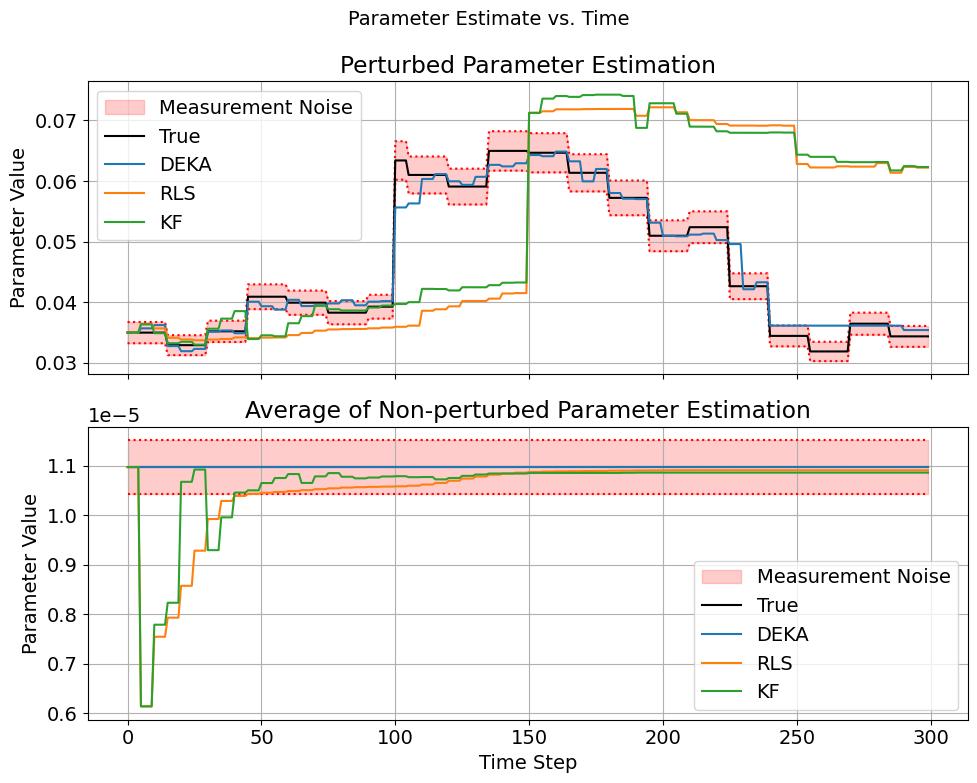

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Create one figure with two subplots (stacked vertically)
# fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# # ---------------------------
# # Subplot 1: Parameter 0 (shifted parameter)
# # ---------------------------
# fig.suptitle('Parameter Estimate vs. Time', fontsize=14)

# # Compute the noise bounds (5% above and below)
# theta_deka_upper = theta_deka_array[:, 0] * 1.05
# theta_deka_lower = theta_deka_array[:, 0] * 0.95

# # Fill the region for measurement noise in light red
# axs[0].fill_between(t, theta_deka_lower, theta_deka_upper, color='red', alpha=0.2, label='Measurement Noise')

# # Plot the noise bounds as red dotted lines
# axs[0].plot(t, theta_deka_upper, 'r:')
# axs[0].plot(t, theta_deka_lower, 'r:')

# # Plot the true parameter in solid black
# axs[0].plot(t, theta_deka_array[:, 0], color='black', linestyle='-', label='True')

# # Plot the estimated parameters
# axs[0].plot(t, theta_hat_deka_array[:, 0], label='DEKA')
# axs[0].plot(t, theta_hat_rls_array[:, 0], label='RLS')
# axs[0].plot(t, theta_hat_ekf_array[:, 0], label='KF')

# axs[0].set_title('Perturbed Parameter Estimation')
# axs[0].set_ylabel('Parameter Value')
# axs[0].legend()
# axs[0].grid(True)

# # ---------------------------
# # Subplot 2: Average of Remaining Parameters (parameters 1 to end)
# # ---------------------------
# # Compute the average (across parameter indices 1 to end) for each time step.
# theta_hat_deka_avg = np.mean(theta_hat_deka_array[:, 1:], axis=1)
# theta_hat_rls_avg  = np.mean(theta_hat_rls_array[:, 1:], axis=1)
# theta_hat_ekf_avg  = np.mean(theta_hat_ekf_array[:, 1:], axis=1)
# theta_deka_avg     = np.mean(theta_deka_array[:, 1:], axis=1)

# # Compute the noise bounds (5% above and below for averaged parameters)
# theta_deka_avg_upper = theta_deka_avg * 1.05
# theta_deka_avg_lower = theta_deka_avg * 0.95

# # Fill the region for measurement noise in light red
# axs[1].fill_between(t, theta_deka_avg_lower, theta_deka_avg_upper, color='red', alpha=0.2, label='Measurement Noise')

# # Plot the noise bounds as red dotted lines
# axs[1].plot(t, theta_deka_avg_upper, 'r:')
# axs[1].plot(t, theta_deka_avg_lower, 'r:')

# # Plot the true parameter in solid black
# axs[1].plot(t, theta_deka_avg, color='black', linestyle='-', label='True')

# # Plot the estimated parameters
# axs[1].plot(t, theta_hat_deka_avg, label='DEKA')
# axs[1].plot(t, theta_hat_rls_avg, label='RLS')
# axs[1].plot(t, theta_hat_ekf_avg, label='KF')

# axs[1].set_title('Average of Non-perturbed Parameter Estimation')
# axs[1].set_xlabel('Time Step')
# axs[1].set_ylabel('Parameter Value')
# axs[1].legend()
# axs[1].grid(True)

# plt.tight_layout()
# plt.show()


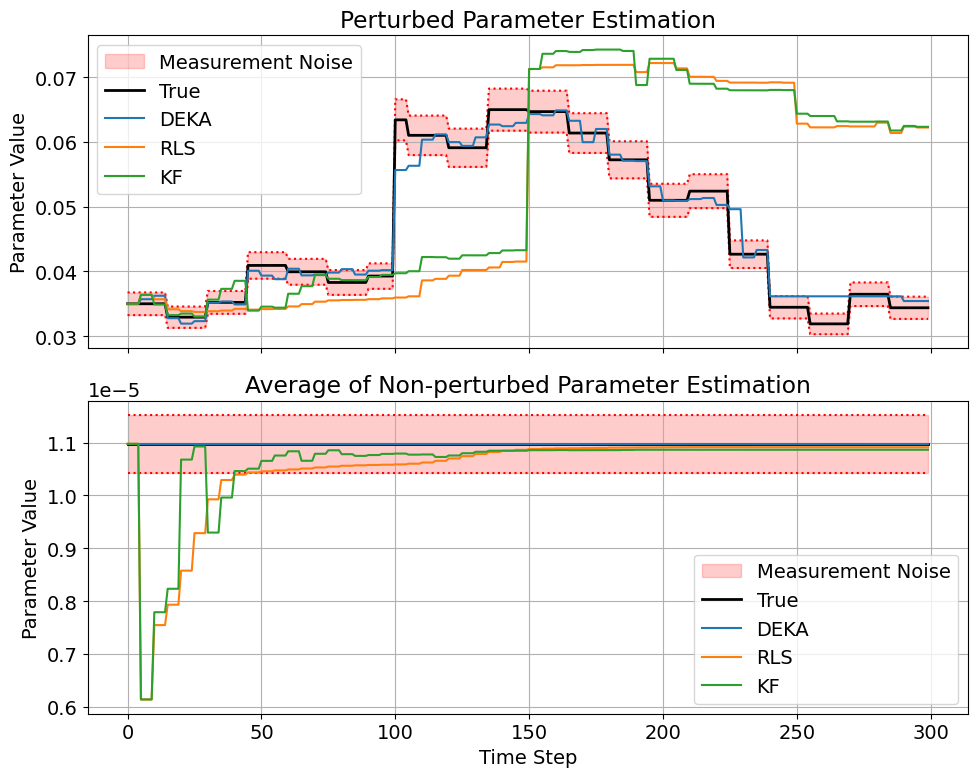

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Define consistent colors
colors = {
    'deka': 'tab:blue',
    'rls': 'tab:orange',
    'kf': 'tab:green',
    'true': 'black',
    'noise_region': 'red',
    'noise_bound': 'red'
}

# Create one figure with two subplots (stacked vertically)
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# ---------------------------
# Subplot 1: Parameter 0 (shifted parameter)
# ---------------------------

# Compute the noise bounds (5% above and below)
theta_deka_upper = theta_deka_array[:, 0] * 1.05
theta_deka_lower = theta_deka_array[:, 0] * 0.95

# Fill the region for measurement noise in light red
axs[0].fill_between(t, theta_deka_lower, theta_deka_upper, color=colors['noise_region'], alpha=0.2, label='Measurement Noise')

# Plot the noise bounds as red dotted lines
axs[0].plot(t, theta_deka_upper, color=colors['noise_bound'], linestyle=':')
axs[0].plot(t, theta_deka_lower, color=colors['noise_bound'], linestyle=':')

# Plot the true parameter in solid black
axs[0].plot(t, theta_deka_array[:, 0], color=colors['true'], linestyle='-', linewidth=2, label='True')

# Plot the estimated parameters with consistent colors
axs[0].plot(t, theta_hat_deka_array[:, 0], color=colors['deka'], label='DEKA')
axs[0].plot(t, theta_hat_rls_array[:, 0], color=colors['rls'], label='RLS')
axs[0].plot(t, theta_hat_ekf_array[:, 0], color=colors['kf'], label='KF')

axs[0].set_title('Perturbed Parameter Estimation')
axs[0].set_ylabel('Parameter Value')
axs[0].legend()
axs[0].grid(True)

# ---------------------------
# Subplot 2: Average of Remaining Parameters (parameters 1 to end)
# ---------------------------
# Compute the average (across parameter indices 1 to end) for each time step.
theta_hat_deka_avg = np.mean(theta_hat_deka_array[:, 1:], axis=1)
theta_hat_rls_avg  = np.mean(theta_hat_rls_array[:, 1:], axis=1)
theta_hat_ekf_avg  = np.mean(theta_hat_ekf_array[:, 1:], axis=1)
theta_deka_avg     = np.mean(theta_deka_array[:, 1:], axis=1)

# Compute the noise bounds (5% above and below for averaged parameters)
theta_deka_avg_upper = theta_deka_avg * 1.05
theta_deka_avg_lower = theta_deka_avg * 0.95

# Fill the region for measurement noise in light red
axs[1].fill_between(t, theta_deka_avg_lower, theta_deka_avg_upper, color=colors['noise_region'], alpha=0.2, label='Measurement Noise')

# Plot the noise bounds as red dotted lines
axs[1].plot(t, theta_deka_avg_upper, color=colors['noise_bound'], linestyle=':')
axs[1].plot(t, theta_deka_avg_lower, color=colors['noise_bound'], linestyle=':')

# Plot the true parameter in solid black
axs[1].plot(t, theta_deka_avg, color=colors['true'], linestyle='-', linewidth=2, label='True')

# Plot the estimated parameters with consistent colors
axs[1].plot(t, theta_hat_deka_avg, color=colors['deka'], label='DEKA')
axs[1].plot(t, theta_hat_rls_avg, color=colors['rls'], label='RLS')
axs[1].plot(t, theta_hat_ekf_avg, color=colors['kf'], label='KF')

axs[1].set_title('Average of Non-perturbed Parameter Estimation')
axs[1].set_xlabel('Time Step')
axs[1].set_ylabel('Parameter Value')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


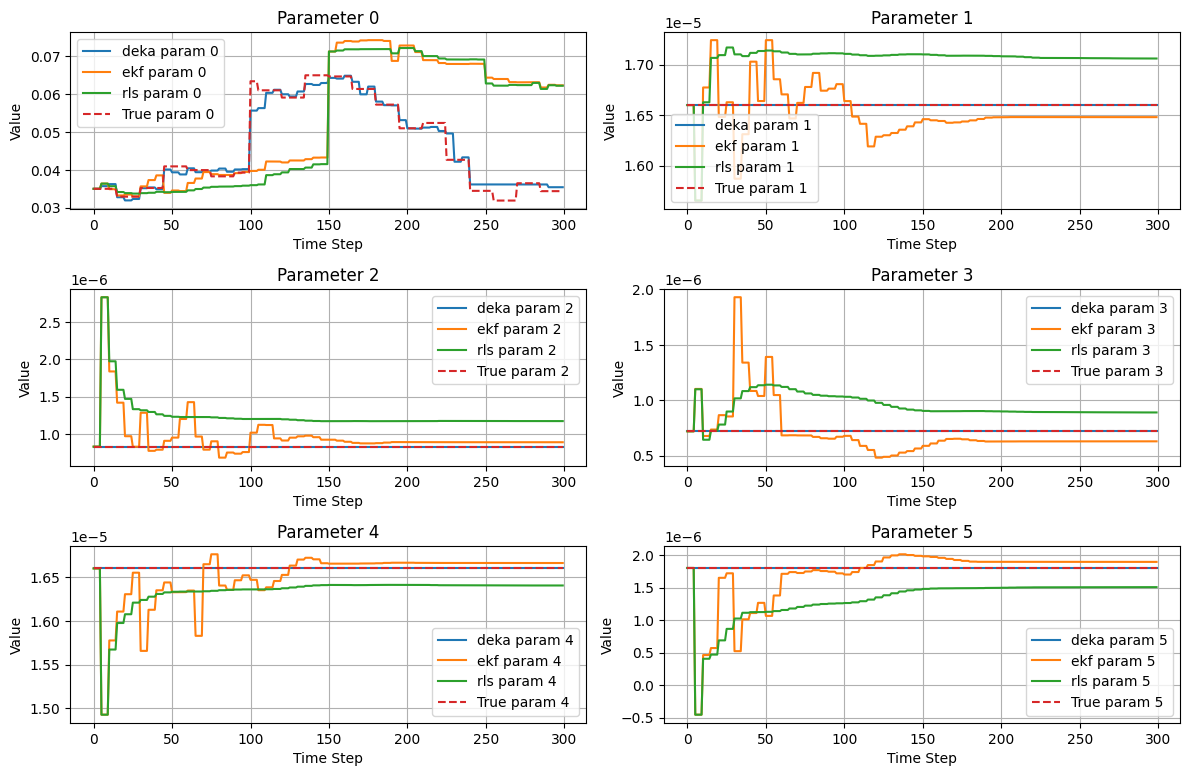

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Assume the following arrays are already defined:
# t: a 1D array for time steps
# theta_hat_deka_array: estimated parameters from DEKA, shape (N, num_params)
# theta_hat_rls_array: estimated parameters from RLS, shape (N, num_params)
# theta_hat_ekf_array: estimated parameters from EKF, shape (N, num_params)
# theta_deka_array: true parameter values, shape (N, num_params)

fig, axs = plt.subplots(4, 2, figsize=(12, 10))
axs = axs.flatten()  # Make it a 1D list of axes for easy iteration

for j in range(6):
    axs[j].plot(t, theta_hat_deka_array[:, j], label=f'deka param {j}')
    axs[j].plot(t, theta_hat_ekf_array[:, j], label=f'ekf param {j}')
    axs[j].plot(t, theta_hat_rls_array[:, j], label=f'rls param {j}')
    axs[j].plot(t, theta_deka_array[:, j], '--', label=f'True param {j}')
    axs[j].set_title(f'Parameter {j}')
    axs[j].set_xlabel('Time Step')
    axs[j].set_ylabel('Value')
    axs[j].legend()
    axs[j].grid(True)

# Hide the 8th subplot if you only have 7 params
axs[-1].set_visible(False)
axs[-2].set_visible(False)


plt.tight_layout()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (400,) and (300,)

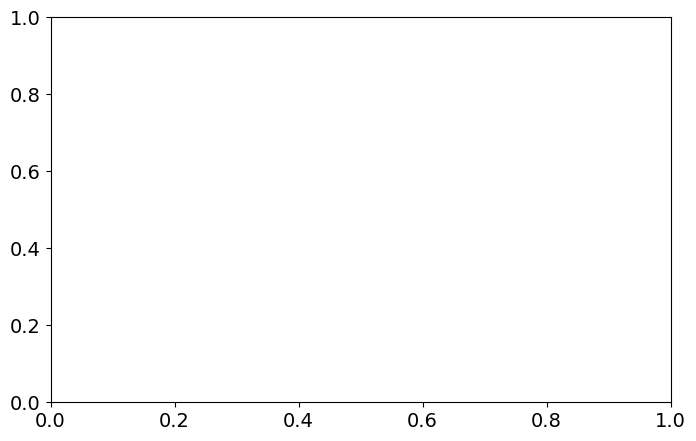

In [12]:

mse_deka = np.mean((theta_hat_deka_array - theta_deka_array)**2, axis=1)
mse_ekf  = np.mean((theta_hat_ekf_array  - theta_deka_array)**2, axis=1)
mse_rls  = np.mean((theta_hat_rls_array  - theta_deka_array)**2, axis=1)

# plt.figure(figsize=(7,5))
# plt.plot(t, mse_deka, label='DEKA MSE')
# plt.plot(t, mse_rls,  label='RLS MSE')
# plt.plot(t, mse_ekf,  label='EKF MSE')
# plt.xlabel('Time Step')
# plt.ylabel('MSE (across all params)')
# plt.legend()
# plt.grid(True)
# plt.show()


# Increase global font size for better readability
plt.rcParams.update({'font.size': 14})

# Example data (replace with actual arrays)
# mse_deka, mse_ekf, mse_rls should be arrays of MSE values over time
t = np.arange(400)  # time steps [dimensionless index]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot MSE curves with different markers and line styles
ax.plot(t, mse_deka, '*-', markevery = 10, label='DEKA MSE')
ax.plot(t, mse_rls,  'v--',  markevery = 10, label='RLS MSE')
ax.plot(t, mse_ekf,  'o-',  markevery = 10, label='EKF MSE')

# Add a vertical dashed line at t = 50
# ax.axvline(x=50, color='k', linestyle='--')

# Label axes with units or context (if any)
ax.set_xlabel('Time Step')
ax.set_ylabel('Mean Squared Error')

# Add grid and legend
ax.grid(True)
ax.legend(loc='upper right')

# Tight layout for neatness; no figure title
plt.title('Average (MSE) Error in Parameter Tracking')
plt.tight_layout()
plt.show()

In [ ]:
# fig, axs = plt.subplots(4, 2, figsize=(12, 10))
# axs = axs.flatten()  # Make it a 1D list of axes for easy iteration

# for j in range(6):
#     axs[j].plot(t, theta_hat_ekf_array[:, j], label=f'kf param {j}')
#     axs[j].plot(t, theta_deka_array[:, j], '--', label=f'True param {j}')
#     axs[j].set_title(f'Parameter {j}')
#     axs[j].set_xlabel('Time Step')
#     axs[j].set_ylabel('Value')
#     axs[j].legend()
#     axs[j].grid(True)

# # Hide the 8th subplot if you only have 7 params
# axs[-1].set_visible(False)
# axs[-2].set_visible(False)


# plt.tight_layout()
# plt.show()

## Simulate 100 times to obtain average mse comparison 

In [ ]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

ModuleNotFoundError: No module named 'tqdm'

In [ ]:
# param_est = OnlineParamEst()

# num_runs = 1

# mse_deka_list = []
# mse_rls_list  = []
# mse_kf_list  = []

# def add_random_10pct_variance_diag(mat_nominal, std_dev=0.1):
#     """
#     Adds random diagonal scaling to a nominal diagonal matrix.
#     Each diagonal entry is scaled by (1 + alpha), alpha ~ N(0, std_dev).
#     """
#     diag_base = np.diag(mat_nominal)
#     # random scale factors for each diagonal entry
#     alpha = np.random.randn(len(diag_base)) * std_dev  # shape = (dim,)
#     # ensure we don't end up with negative scales, if we like:
#     # alpha = np.clip(alpha, -0.99, None)  # so we never scale below 1%
    
#     diag_scaled = diag_base * (1.0 + alpha)
#     return np.diag(diag_scaled)
# Q = 1e-3 * np.eye(6)
# R = 1e-3 * np.eye(3*10)
# for run_idx in tqdm(range(num_runs)):
#     # 1) Run your three simulations
   
#     Q_noise = add_random_10pct_variance_diag(Q, std_dev=0.1)
#     R_noise = add_random_10pct_variance_diag(R, std_dev=0.1)
#     x_kf,   u_kf,   theta_kf,   theta_hat_kf    = param_est.simulate_quadrotor_hover_with_KF(Q_noise, R_noise)
#     x_deka,  u_deka,  theta_deka,  theta_hat_deka   = param_est.simulate_quadrotor_hover_with_DEKA()
#     x_rls,   u_rls,   theta_rls,   theta_hat_rls    = param_est.simulate_quadrotor_hover_with_RLS()
    
    
# #     # 2) Convert lists to arrays (if needed)
#     theta_deka_array     = np.array(theta_deka)
#     theta_hat_deka_array = np.array(theta_hat_deka)
#     theta_rls_array      = np.array(theta_rls)
#     theta_hat_rls_array  = np.array(theta_hat_rls)
#     theta_kf_array      = np.array(theta_kf)
#     theta_hat_kf_array  = np.array(theta_hat_kf)

# #     # 3) Compute MSE for each method in this run
# #     #    (One single MSE across all time steps & parameters)
#     mse_deka = np.mean((theta_hat_deka_array - theta_deka_array)**2)
#     mse_rls  = np.mean((theta_hat_rls_array  - theta_rls_array)**2)
#     mse_kf  = np.mean((theta_hat_kf_array  - theta_kf_array)**2)

# #     # 4) Append them to lists for averaging later
#     mse_deka_list.append(mse_deka)
#     mse_rls_list.append(mse_rls)
#     mse_kf_list.append(mse_kf)

# # # 5) After num_runs, compute average MSE
# avg_mse_deka = np.mean(mse_deka_list)
# avg_mse_rls  = np.mean(mse_rls_list)
# avg_mse_kf  = np.mean(mse_kf_list)

# # # 6) Print or store these results
# print("Average MSE (DEKA):", avg_mse_deka)
# print("Average MSE (RLS): ", avg_mse_rls)
# print("Average MSE (KF): ", avg_mse_kf)

100%|██████████| 1/1 [01:21<00:00, 81.35s/it]

Average MSE (DEKA): 8.899035092017436e-06
Average MSE (RLS):  8.124552257197415e-06
Average MSE (KF):  8.068001131477839e-06
